### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_X_df = application_df.drop(columns=["EIN","NAME"])
application_X_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE

# Generate our categorical variable lists
application_cat = application_X_df.dtypes[application_X_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_X_df[application_cat].nunique()


APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

# Application_type counts
application_counts = application_X_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

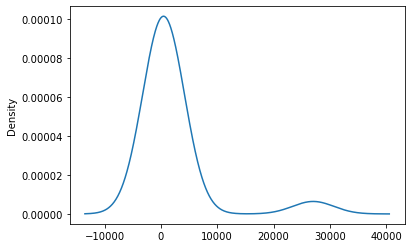

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE

# Visualize the value counts
application_counts.plot.density()

<AxesSubplot:xlabel='index'>

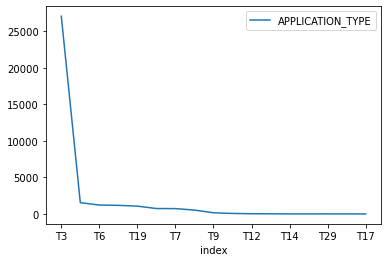

In [6]:
# Create a dataframe plotting application_type and counts
application_counts_df=pd.DataFrame(application_counts, columns=["APPLICATION_TYPE"])
# Plot the Classification counts
application_counts_df.reset_index().plot(x="index", y="APPLICATION_TYPE")

In [7]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE

# Replace counts less than 500 and bin them as "others"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_X_df.APPLICATION_TYPE = application_X_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_X_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

# classification_type counts
classification_counts = application_X_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1245        1
C1900        1
C3700        1
C6100        1
C1732        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

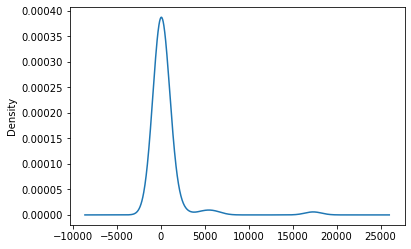

In [9]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

<AxesSubplot:xlabel='index'>

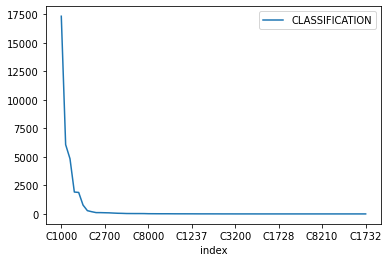

In [10]:
# Create a dataframe plotting classfication data and counts
class_counts_df=pd.DataFrame(classification_counts, columns=["CLASSIFICATION"])
# Plot the Classification counts
class_counts_df.reset_index().plot(x="index", y="CLASSIFICATION")

In [11]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE

# Replace counts less than 1000 and bin them as "others"
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_X_df.CLASSIFICATION = application_X_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_X_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_X_df.dtypes[application_X_df.dtypes == "object"].index.tolist()

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE

encode_df = pd.DataFrame(enc.fit_transform(application_X_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE

application_X_df = application_X_df.merge(encode_df, left_index=True, right_index=True)
application_X_df = application_X_df.drop(application_cat, 1)
application_X_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_X_df["IS_SUCCESSFUL"].values
X = application_X_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

# Number of input features is equal to the number of variables
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
# Note: Number of input features is 43

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))       

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"] )

In [19]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train,y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 8755.8408 - accuracy: 0.4989
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 4943.8589 - accuracy: 0.5180
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 3483.1992 - accuracy: 0.5118
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 4511.0781 - accuracy: 0.5104
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 2158.7385 - accuracy: 0.5079
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 2410.1934 - accuracy: 0.5216
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 1843.2513 - accuracy: 0.5296
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 4385.2246 - accuracy: 0.5306
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 1157.5358 - accuracy: 0.5187
Epoch 10/100
804/804 [==============================] - 1s 1ms/s

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.5058 - accuracy: 0.6988 - 305ms/epoch - 1ms/step
Loss: 1.5057731866836548, Accuracy: 0.6987755298614502


### Create a checkpoint and create a callback object for the deep larning model.

In [21]:
#-----Farida work ------
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
#---Farida work continued ----
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weight every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model using the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=cp_callback )


# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
  1/804 [..............................] - ETA: 5:00 - loss: 1.2636 - accuracy: 0.6562
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 2s - loss: 1.1892 - accuracy: 0.7359  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 1.1537 - accuracy: 0.7070
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 60/804 [=>..........................

477/804 [================>.............] - ETA: 1s - loss: 0.7107 - accuracy: 0.6971
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.7079 - accuracy: 0.6965
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.7029 - accuracy: 0.6974
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.6997 - accuracy: 0.6976
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model


Epoch 00002: saving model to checkpoints\weights.02.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5743 - accuracy: 0.7246
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.5758 - accuracy: 0.7228
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.5787 - accuracy: 0.7220
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
209/804 [======>.......................] - ETA: 2s -

625/804 [======================>.......] - ETA: 0s - loss: 0.5767 - accuracy: 0.7207
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5772 - accuracy: 0.7206
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5763 - accuracy: 0.7211
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5771 - accuracy: 0.7207
Epoch 00002: saving model

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5639 - accuracy: 0.7251
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5636 - accuracy: 0.7247
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5621 - accuracy: 0.7258
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.

Epoch 4/50
  1/804 [..............................] - ETA: 1s - loss: 0.5842 - accuracy: 0.7500
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7445
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5544 - accuracy: 0.7386
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7290
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: s

493/804 [=================>............] - ETA: 1s - loss: 0.5624 - accuracy: 0.7257
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.5627 - accuracy: 0.7259
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5622 - accuracy: 0.7262
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5635 - accuracy: 0.7249
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model


Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.5571 - accuracy: 0.7261
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.5564 - accuracy: 0.7286
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.5563 - accuracy: 0.7290
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05

682/804 [========================>.....] - ETA: 0s - loss: 0.5602 - accuracy: 0.7268
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5601 - accuracy: 0.7264
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5598 - accuracy: 0.7268
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5600 - accuracy: 0.7263
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model


Epoch 00006: saving model to checkpoints\weights.06.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5557 - accuracy: 0.7273
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5565 - accuracy: 0.7266
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5564 - accuracy: 0.7267
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
425/804 [==============>...............] - ETA: 1s -

 56/804 [=>............................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7349
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7346
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7264
Epoch 00007: saving model


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5541 - accuracy: 0.7307
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5542 - accuracy: 0.7305
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5544 - accuracy: 0.7306
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07

257/804 [========>.....................] - ETA: 1s - loss: 0.5508 - accuracy: 0.7339
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.5491 - accuracy: 0.7355
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7335
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5502 - accuracy: 0.7334
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model


Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5542 - accuracy: 0.7298
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7301
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7301
Epoch 00008: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5546 - accuracy: 0.7301
Epoch 9/50
  1/804 [..............................] - ETA: 2s - loss: 0.4802 - accuracy: 0.7500
Epoch 00009: saving model to checkpoints\

440/804 [===============>..............] - ETA: 1s - loss: 0.5533 - accuracy: 0.7327
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5539 - accuracy: 0.7328
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5528 - accuracy: 0.7327
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
493/804 [=================>............] - ETA: 0s - loss: 0.5520 - accuracy: 0.7331
Epoch 00009: saving model

 94/804 [==>...........................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7324
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7360
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7366
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7368
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model


Epoch 00010: saving model to checkpoints\weights.10.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5504 - accuracy: 0.7331
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5511 - accuracy: 0.7322
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5507 - accuracy: 0.7322
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
653/804 [=======================>......] - ETA: 0s -

279/804 [=========>....................] - ETA: 1s - loss: 0.5504 - accuracy: 0.7342
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7351
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7351
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5489 - accuracy: 0.7344
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model


Epoch 00011: saving model to checkpoints\weights.11.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5523 - accuracy: 0.7304
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7305
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7305
Epoch 00011: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5527 - accuracy: 0.7305
Epoch 12/50

Epoch 00012: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.7215 - accuracy: 0.6250
Epoch 00012: saving model to checkpoint


Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5525 - accuracy: 0.7308
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5519 - accuracy: 0.7313
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5525 - accuracy: 0.7309
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12

132/804 [===>..........................] - ETA: 2s - loss: 0.5569 - accuracy: 0.7304
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5569 - accuracy: 0.7301
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5592 - accuracy: 0.7282
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
192/804 [======>.......................] - ETA: 1s -


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5525 - accuracy: 0.7306
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5524 - accuracy: 0.7306
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5534 - accuracy: 0.7294
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13


Epoch 00014: saving model to checkpoints\weights.14.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7276
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7276
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.5525 - accuracy: 0.7287
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.5523 - accuracy: 0.7290
Epoch 00014: saving model

 16/804 [..............................] - ETA: 2s - loss: 0.5855 - accuracy: 0.6895
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7046
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5558 - accuracy: 0.7232
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.5527 - accuracy: 0.7239
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model


Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.5523 - accuracy: 0.7289
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5521 - accuracy: 0.7289
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5525 - accuracy: 0.7286
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
577/804 [====================>.........] - ETA: 0s -

200/804 [======>.......................] - ETA: 1s - loss: 0.5506 - accuracy: 0.7325
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5524 - accuracy: 0.7298
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5520 - accuracy: 0.7309
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7299
Epoch 00016: saving model

702/804 [=========================>....] - ETA: 0s - loss: 0.5503 - accuracy: 0.7307
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5509 - accuracy: 0.7300
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5516 - accuracy: 0.7298
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5510 - accuracy: 0.7306
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model

376/804 [=============>................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7296
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5520 - accuracy: 0.7303
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5527 - accuracy: 0.7297
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.5535 - accuracy: 0.7291
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model

 47/804 [>.............................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7467
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7386
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7427
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5494 - accuracy: 0.7373
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model


Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5495 - accuracy: 0.7328
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5504 - accuracy: 0.7319
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5502 - accuracy: 0.7318
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 0.5502 - accuracy: 0.7316
Epoch 00018: saving model

193/804 [======>.......................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7434
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7425
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7389
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5406 - accuracy: 0.7398
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model


Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5483 - accuracy: 0.7334
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5488 - accuracy: 0.7330
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5496 - accuracy: 0.7328
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
728/804 [==========================>...] - ETA: 0s -


Epoch 00020: saving model to checkpoints\weights.20.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5464 - accuracy: 0.7313
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5469 - accuracy: 0.7307
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7306
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5490 - accuracy: 0.7296
Epoch 00020: saving model

 30/804 [>.............................] - ETA: 3s - loss: 0.5486 - accuracy: 0.7365
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.5540 - accuracy: 0.7337
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5574 - accuracy: 0.7290
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.5562 - accuracy: 0.7281
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
 85/804 [==>..............

500/804 [=================>............] - ETA: 1s - loss: 0.5515 - accuracy: 0.7293
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5510 - accuracy: 0.7296
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5510 - accuracy: 0.7301
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.5512 - accuracy: 0.7301
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model


Epoch 00022: saving model to checkpoints\weights.22.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.5583 - accuracy: 0.7204
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5558 - accuracy: 0.7226
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 0.5560 - accuracy: 0.7226
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5543 - accuracy: 0.7246
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model

676/804 [========================>.....] - ETA: 0s - loss: 0.5500 - accuracy: 0.7307
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5502 - accuracy: 0.7308
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5505 - accuracy: 0.7304
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5502 - accuracy: 0.7304
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model

359/804 [============>.................] - ETA: 1s - loss: 0.5527 - accuracy: 0.7303
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5534 - accuracy: 0.7301
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5524 - accuracy: 0.7307
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5519 - accuracy: 0.7308
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model


Epoch 00024: saving model to checkpoints\weights.24.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7266
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7357
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5506 - accuracy: 0.7290
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7369
Epoch 00024: saving model

503/804 [=================>............] - ETA: 1s - loss: 0.5503 - accuracy: 0.7306
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.5504 - accuracy: 0.7306
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5506 - accuracy: 0.7303
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5510 - accuracy: 0.7302
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model

169/804 [=====>........................] - ETA: 2s - loss: 0.5620 - accuracy: 0.7195
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.5608 - accuracy: 0.7218
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.5592 - accuracy: 0.7227
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5587 - accuracy: 0.7236
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model

639/804 [======================>.......] - ETA: 0s - loss: 0.5514 - accuracy: 0.7300
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5515 - accuracy: 0.7297
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5510 - accuracy: 0.7298
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5505 - accuracy: 0.7305
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5503 - accuracy: 0.7304

303/804 [==========>...................] - ETA: 1s - loss: 0.5520 - accuracy: 0.7297
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5511 - accuracy: 0.7307
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5514 - accuracy: 0.7305
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5513 - accuracy: 0.7305
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5518 - accuracy: 0.7304

780/804 [============================>.] - ETA: 0s - loss: 0.5500 - accuracy: 0.7316
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7315
Epoch 00026: saving model to checkpoints\weights.26.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5500 - accuracy: 0.7313
Epoch 27/50

Epoch 00027: saving model to checkpoints\weights.27.hdf5
  1/804 [..............................] - ETA: 11s - loss: 0.6741 - accuracy: 0.5938
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7109 
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoin

446/804 [===============>..............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7329
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5464 - accuracy: 0.7331
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5450 - accuracy: 0.7340
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7332
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model


Epoch 00028: saving model to checkpoints\weights.28.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7370
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7351
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7367
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7356
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model

622/804 [======================>.......] - ETA: 0s - loss: 0.5508 - accuracy: 0.7306
Epoch 00028: saving model to checkpoints\weights.28.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5510 - accuracy: 0.7305
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5509 - accuracy: 0.7306
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5506 - accuracy: 0.7306
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5503 - accuracy: 0.7307
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5



Epoch 00029: saving model to checkpoints\weights.29.hdf5
233/804 [=======>......................] - ETA: 3s - loss: 0.5476 - accuracy: 0.7248
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7245
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7239
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7246
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model


Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5509 - accuracy: 0.7300
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5505 - accuracy: 0.7303
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5497 - accuracy: 0.7309
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5496 - accuracy: 0.7312
Epoch 00029: saving model

380/804 [=============>................] - ETA: 1s - loss: 0.5551 - accuracy: 0.7294
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5546 - accuracy: 0.7298
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5540 - accuracy: 0.7300
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.5535 - accuracy: 0.7301
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model

 46/804 [>.............................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7385
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7392
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7416
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7372
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model

531/804 [==================>...........] - ETA: 0s - loss: 0.5475 - accuracy: 0.7334
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5476 - accuracy: 0.7332
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5473 - accuracy: 0.7335
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5474 - accuracy: 0.7335
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7294
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5457 - accuracy: 0.7293
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7316
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
265/804 [========>.....................] - ETA: 1s - 

696/804 [========================>.....] - ETA: 0s - loss: 0.5487 - accuracy: 0.7321
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5492 - accuracy: 0.7317
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5490 - accuracy: 0.7322
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5486 - accuracy: 0.7327
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model

369/804 [============>.................] - ETA: 1s - loss: 0.5539 - accuracy: 0.7248
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5531 - accuracy: 0.7258
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5524 - accuracy: 0.7264
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5525 - accuracy: 0.7265
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model


Epoch 00034: saving model to checkpoints\weights.34.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7455
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5469 - accuracy: 0.7376
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5524 - accuracy: 0.7338
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7286
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model

Epoch 00034: saving model to checkpoints\weights.34.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.5462 - accuracy: 0.7347
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5465 - accuracy: 0.7345
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5467 - accuracy: 0.7341
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5465 - accuracy: 0.7340
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model 

179/804 [=====>........................] - ETA: 2s - loss: 0.5544 - accuracy: 0.7273
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5535 - accuracy: 0.7281
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7295
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7304
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model

Epoch 00035: saving model to checkpoints\weights.35.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5492 - accuracy: 0.7306
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5499 - accuracy: 0.7305
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5494 - accuracy: 0.7310
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5495 - accuracy: 0.7311
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model 

345/804 [===========>..................] - ETA: 1s - loss: 0.5508 - accuracy: 0.7257
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5522 - accuracy: 0.7251
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5521 - accuracy: 0.7253
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5529 - accuracy: 0.7251
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model

 16/804 [..............................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7480 
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7460
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7320
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 66/804 [=>............................] - ETA: 2s - loss: 0.5636 - accuracy: 0.7259
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving mode


Epoch 00037: saving model to checkpoints\weights.37.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.5476 - accuracy: 0.7326
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5479 - accuracy: 0.7319
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5489 - accuracy: 0.7306
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5493 - accuracy: 0.7303
Epoch 00037: saving model

167/804 [=====>........................] - ETA: 2s - loss: 0.5386 - accuracy: 0.7408
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7419
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7394
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7414
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
222/804 [=======>.........

633/804 [======================>.......] - ETA: 0s - loss: 0.5499 - accuracy: 0.7324
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.5490 - accuracy: 0.7330
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.5482 - accuracy: 0.7335
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5481 - accuracy: 0.7337
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model


Epoch 00039: saving model to checkpoints\weights.39.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7304
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5480 - accuracy: 0.7319
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7326
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7328
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model

799/804 [============================>.] - ETA: 0s - loss: 0.5484 - accuracy: 0.7323
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5486 - accuracy: 0.7322
Epoch 40/50
  1/804 [..............................] - ETA: 0s - loss: 0.5833 - accuracy: 0.7500
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5460 - accuracy: 0.7366
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7457
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints


Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5470 - accuracy: 0.7363
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7368
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7361
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5460 - accuracy: 0.7360
Epoch 00040: saving model

121/804 [===>..........................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7335
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
139/804 [====>.........................] - ETA: 2s - loss: 0.5483 - accuracy: 0.7302
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5456 - accuracy: 0.7333
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7340
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model

600/804 [=====================>........] - ETA: 0s - loss: 0.5505 - accuracy: 0.7315
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5497 - accuracy: 0.7325
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5491 - accuracy: 0.7329
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5497 - accuracy: 0.7328
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model

271/804 [=========>....................] - ETA: 1s - loss: 0.5496 - accuracy: 0.7336
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7357
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5487 - accuracy: 0.7354
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5493 - accuracy: 0.7354
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.5491 - accuracy: 0.7357


Epoch 00042: saving model to checkpoints\weights.42.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5489 - accuracy: 0.7326
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5490 - accuracy: 0.7328
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5492 - accuracy: 0.7324
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5488 - accuracy: 0.7325
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model


Epoch 00043: saving model to checkpoints\weights.43.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5483 - accuracy: 0.7346
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5484 - accuracy: 0.7343
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7346
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5475 - accuracy: 0.7346
Epoch 00043: saving model


Epoch 00044: saving model to checkpoints\weights.44.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7377
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7339
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7329
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7335
Epoch 00044: saving model

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5479 - accuracy: 0.7345
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7339
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5488 - accuracy: 0.7335
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5480 - accuracy: 0.7340
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model 


Epoch 00045: saving model to checkpoints\weights.45.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.5405 - accuracy: 0.7377
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.5418 - accuracy: 0.7357
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7353
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7359
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model


Epoch 00045: saving model to checkpoints\weights.45.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5478 - accuracy: 0.7324
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5473 - accuracy: 0.7329
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5483 - accuracy: 0.7322
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5476 - accuracy: 0.7330
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model

355/804 [============>.................] - ETA: 1s - loss: 0.5483 - accuracy: 0.7325
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7329
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5474 - accuracy: 0.7332
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5475 - accuracy: 0.7329
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model

 16/804 [..............................] - ETA: 2s - loss: 0.5772 - accuracy: 0.7129 
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5599 - accuracy: 0.7320
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7325
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 66/804 [=>............................] - ETA: 2s - loss: 0.5454 - accuracy: 0.7386
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving mode

491/804 [=================>............] - ETA: 1s - loss: 0.5432 - accuracy: 0.7370
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7364
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.5452 - accuracy: 0.7354
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5468 - accuracy: 0.7341
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model


Epoch 00048: saving model to checkpoints\weights.48.hdf5
167/804 [=====>........................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7343
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.5493 - accuracy: 0.7302
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7319
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.5490 - accuracy: 0.7327
Epoch 00048: saving model

642/804 [======================>.......] - ETA: 0s - loss: 0.5468 - accuracy: 0.7344
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5462 - accuracy: 0.7351
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5466 - accuracy: 0.7346
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5469 - accuracy: 0.7345
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model

328/804 [===========>..................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7355
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7369
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5449 - accuracy: 0.7371
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5479 - accuracy: 0.7350
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model

804/804 [==============================] - 3s 3ms/step - loss: 0.5478 - accuracy: 0.7335
Epoch 50/50
  1/804 [..............................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7812
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5726 - accuracy: 0.7188
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.5667 - accuracy: 0.7231
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5670 - accuracy: 0.7159
Epoch 00050: saving model to checkpoints

484/804 [=================>............] - ETA: 1s - loss: 0.5505 - accuracy: 0.7299
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5496 - accuracy: 0.7306
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.5488 - accuracy: 0.7316
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7320
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model

<AxesSubplot:>

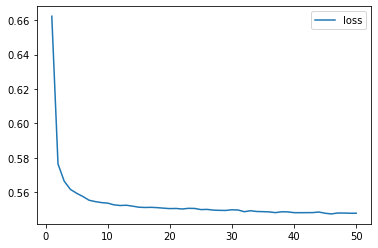

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

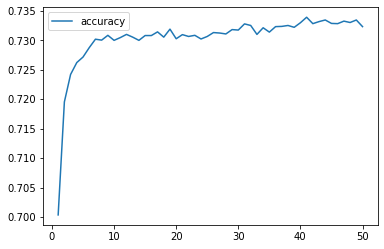

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")